# Faults visualization

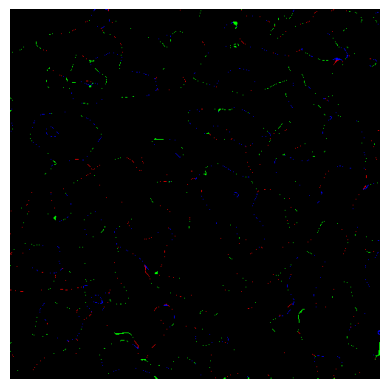

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the images
predicted_mask = Image.open('predicted_mask.png')
true_mask = Image.open('true_mask.png')

# Convert images to grayscale
predicted_mask = predicted_mask.convert('L')
true_mask = true_mask.convert('L')

# Ensure the images are the same size
if predicted_mask.size != true_mask.size:
    print("Images are not the same size. Resizing predicted_mask...")
    predicted_mask = predicted_mask.resize(true_mask.size)

# Convert images to numpy arrays
predicted_mask_array = np.array(predicted_mask)
true_mask_array = np.array(true_mask)

# Calculate the difference
difference = predicted_mask_array - true_mask_array

# Create an empty RGB image to visualize the faults
faults = np.zeros((*predicted_mask_array.shape, 3), dtype=np.uint8)

# Assign different colors to the faults for each class
faults[(predicted_mask_array == 0) & (true_mask_array != 0)] = [255, 0, 0]   # Red for class 1
faults[(predicted_mask_array == 127) & (true_mask_array != 127)] = [0, 255, 0]   # Green for class 2
faults[(predicted_mask_array == 255) & (true_mask_array != 255)] = [0, 0, 255]   # Blue for class 3

# Convert faults back to image
faults_image = Image.fromarray(faults)

# # Display the faults
# %matplotlib inline

# Display the faults image
size = faults_image.size[0]
plt.imshow(faults_image)
plt.axis('off')  # to hide the axis
plt.show()

faults_image.save('faults.png')

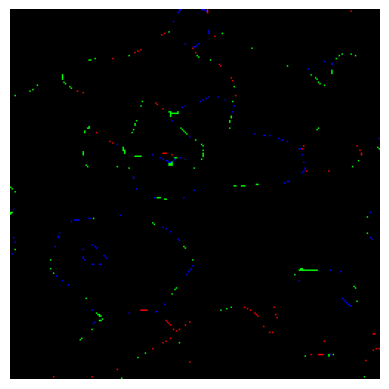

In [11]:
# Subsection of the faults image
subsection = faults_image.crop((0, 0, size/2, size/2))
plt.imshow(subsection)
plt.axis('off')  # to hide the axis
plt.show()

# Confusion matrix

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Flatten the arrays
predicted_mask_flat = predicted_mask_array.ravel()
true_mask_flat = true_mask_array.ravel()

# Compute the confusion matrix
cm = confusion_matrix(true_mask_flat, predicted_mask_flat)

# Compute the confusion matrix
cm = confusion_matrix(true_mask_flat, predicted_mask_flat)

# Print the confusion matrix
print(cm)

[[ 78741    305    204]
 [   341 112015    399]
 [    85    506  58405]]


Normalized confusion matrix
[[0.99357729 0.00384858 0.00257413]
 [0.00302426 0.9934371  0.00353865]
 [0.00144078 0.00857685 0.98998237]]


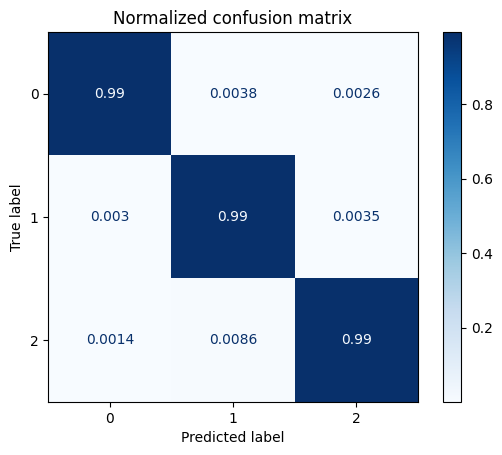

<Figure size 640x480 with 0 Axes>

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

title = "Normalized confusion matrix"
disp = ConfusionMatrixDisplay.from_predictions(
    true_mask_flat,
    predicted_mask_flat,
    display_labels=[0, 1, 2],
    cmap=plt.cm.Blues,
    normalize="true",
)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()
plt.savefig('confusion_matrix.png')